# Importar librerias

Una vez realizado el analisis de las variables, se identifico que el objeto del contrato es la variable que contiene mayor información para poder determinar el sector del contrato. Por esta razón, se realiza el procesamiento de la variable a continuación:

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import unidecode
import re
import spacy
from contexto.stemming import Stemmer, stem_texto

from contexto.limpieza import * 

# librerias propias
dir_proyecto, _ = os.path.split(os.getcwd())
sys.path.append(dir_proyecto)
from SCRIPTS.funciones import *
nlp = spacy.load("es_core_news_sm")


In [2]:

limpieza_contexto_stemming("La comida llegó fría, implementación, el serbizio fue muy malo! algoquesededeborraresmuylargo cundinamarca")


['com', 'lleg', 'fri', 'implementacion', 'servici']

In [3]:
limpieza_basica("La comida llegó fría, el implementación serbizio fue muy malo! algoquesededeborraresmuylargo cundinamarca")

'la comida llegó fría el implementación serbizio fue muy malo algoquesededeborraresmuylargo cundinamarca'

In [4]:
limpieza_contexto("La comida llegó fría, el implementación serbizio fue muy malo! algoquesededeborraresmuylargo cundinamarca")


['comida', 'llegar', 'fria', 'implementacion', 'servicio']

In [5]:
# Cargamos los datos
cont_df = leer_parquet(os.path.join(dir_proyecto,'INPUTS'))
cont_sin_nan_df = cont_df[~cont_df['objeto_del_contrato'].isna()].reset_index(drop=True)


In [6]:
cont_sin_nan_df['largo'] = [len(ele) for ele in cont_sin_nan_df['objeto_del_contrato']]




In [7]:
#muestra_500 = cont_sin_nan_df[cont_sin_nan_df['largo']==500].reset_index(drop=True)
muestra_500 = cont_sin_nan_df.groupby('sector').sample(frac=0.35, random_state=2).reset_index(drop=True)
muestra_500

nombre_entidad nit_entidad  \
0      ESTABLECIMIENTO PÚBLICO AMBIENTAL DEL DISTRITO...   900816913   
1      AGENCIA DISTRITAL DE INFRAESTRUCTURA DEL DISTR...   802024407   
2                 AREA METROPOLITANA DEL VALLE DE ABURRA   890984423   
3                                              CORTOLIMA   890704536   
4                         FONDO NACIONAL AMBIENTAL  ANLA   830025267   
...                                                  ...         ...   
13931                               MUNICIPIO DE LA CEJA   890981207   
13932  ALCALDÍA LOCAL DE CHAPINERO  FONDO DE DESARROL...   899999061   
13933                               MUNICIPIO DE LA CEJA   890981207   
13934  CORPORACIÓN NACIONAL PARA LA RECONSTRUCCIÓN DE...   800237214   
13935                            MINISTERIO DEL INTERIOR   830114475   

                     departamento        ciudad  \
0                 Valle del Cauca  Buenaventura   
1                       Atlántico  Barranquilla   
2                       Antioquia   No Definido   
3                          Tolima        Ibagué   
4      Distrito Capital de Bogotá   No Definido   
...                           ...           ...   
13931                   Antioquia       La Ceja   
13932  Distrito Capital de Bogotá        Bogotá   
13933                   Antioquia       La Ceja   
13934                       Cauca       Popayán   
13935  Distrito Capital de Bogotá        Bogotá   

                                     localizaci_n                 orden  \
0      Colombia,  Valle del Cauca ,  Buenaventura  Corporación Autónoma   
1            Colombia,  Atlántico ,  Barranquilla           Territorial   
2                            Colombia,  Antioquia           Territorial   
3                     Colombia,  Tolima ,  Ibagué              Nacional   
4                        Colombia, Bogotá, Bogotá              Nacional   
...                                           ...                   ...   
13931             Colombia,  Antioquia ,  La Ceja           Territorial   
13932                    Colombia, Bogotá, Bogotá           Territorial   
13933             Colombia,  Antioquia ,  La Ceja           Territorial   
13934                 Colombia,  Cauca ,  Popayán              Nacional   
13935                    Colombia, Bogotá, Bogotá              Nacional   

                                 sector                  rama  \
0      Ambiente y Desarrollo Sostenible  Corporación Autónoma   
1      Ambiente y Desarrollo Sostenible  Corporación Autónoma   
2      Ambiente y Desarrollo Sostenible             Ejecutivo   
3      Ambiente y Desarrollo Sostenible  Corporación Autónoma   
4      Ambiente y Desarrollo Sostenible             Ejecutivo   
...                                 ...                   ...   
13931                          interior             Ejecutivo   
13932                          interior             Ejecutivo   
13933                          interior             Ejecutivo   
13934                          interior             Ejecutivo   
13935                          interior             Ejecutivo   

      entidad_centralizada proceso_de_compra  ...  \
0          Descentralizada  CO1.BDOS.4357560  ...   
1          Descentralizada  CO1.BDOS.4799000  ...   
2          Descentralizada  CO1.BDOS.4635129  ...   
3             Centralizada  CO1.BDOS.3991615  ...   
4             Centralizada  CO1.BDOS.3739534  ...   
...                    ...               ...  ...   
13931      Descentralizada  CO1.BDOS.4204467  ...   
13932      Descentralizada  CO1.BDOS.4261398  ...   
13933      Descentralizada  CO1.BDOS.4610341  ...   
13934          No Definido  CO1.BDOS.4602137  ...   
13935         Centralizada  CO1.BDOS.4813815  ...   

      recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_  \
0                                              142500000                 
1                                             1400080000                 
2                      

In [8]:
import dask.dataframe as dd
df_dask = dd.from_pandas(muestra_500, npartitions=1000)

In [9]:
df_dask['limpieza_contexto'] = df_dask['objeto_del_contrato'].map(limpieza_contexto)
df_dask['limpieza_contexto_stemming'] = df_dask['objeto_del_contrato'].map(limpieza_contexto_stemming)
resultado_dask = df_dask.compute()


In [10]:
clean = resultado_dask['limpieza_contexto']
clean_list = []

for registro in clean:
    for palabra in registro:
        clean_list.append(palabra)
clean_list


['aunar',
 'esfuerzo',
 'financiero',
 'tecnico',
 'administrativo',
 'implementacion',
 'estrategia',
 'educacion',
 'ambiental',
 'fortalecer',
 'conocimiento',
 'causa',
 'efecto',
 'cambio',
 'climatico',
 'estudiante',
 'grado',
 'institucion',
 'educativo',
 'jurisdicion',
 'establecimiento',
 'publico',
 'ambiental',
 'distrito',
 'prestacion',
 'servicio',
 'apoyo',
 'gestion',
 'contar',
 'acompanamiento',
 'conceptualizacion',
 'ejecucion',
 'estrategia',
 'comunicacion',
 'relativo',
 'campana',
 'institucional',
 'promover',
 'parque',
 'publico',
 'plaza',
 'zona',
 'verde',
 'trave',
 'utilizacion',
 'mensaje',
 'grafico',
 'creativo',
 'orientacion',
 'visitante',
 'parque',
 'realizacion',
 'actividad',
 'bol',
 'divulgacion',
 'publicacion',
 'difusion',
 'medio',
 'tradicional',
 'alterar',
 'aunar',
 'esfuerzo',
 'consolidar',
 'proyecto',
 'parche',
 'verde',
 'mejorar',
 'conectividad',
 'ecosistema',
 'aburrir',
 'implementar',
 'mantenimiento',
 'silvicultural',


In [11]:
clean_stemming = resultado_dask['limpieza_contexto_stemming']
clean_stemming_list = []

for registro in clean_stemming:
    for palabra in registro:
        clean_stemming_list.append(palabra)
clean_stemming_list

['aun',
 'esfuerz',
 'financier',
 'tecnic',
 'administr',
 'implementacion',
 'estrategi',
 'educacion',
 'ambiental',
 'fortalec',
 'conoc',
 'caus',
 'efect',
 'cambi',
 'climat',
 'estudi',
 'grad',
 'institucion',
 'educ',
 'jurisdicion',
 'establec',
 'public',
 'ambiental',
 'distrit',
 'prestacion',
 'servici',
 'apoy',
 'gestion',
 'cont',
 'acompan',
 'conceptualizacion',
 'ejecucion',
 'estrategi',
 'comunicacion',
 'relat',
 'campan',
 'institucional',
 'promov',
 'parqu',
 'public',
 'plaz',
 'zon',
 'verd',
 'trav',
 'utilizacion',
 'mensaj',
 'grafic',
 'creativ',
 'orientacion',
 'visit',
 'parqu',
 'realizacion',
 'activ',
 'bol',
 'divulgacion',
 'publicacion',
 'difusion',
 'medi',
 'tradicional',
 'alter',
 'aun',
 'esfuerz',
 'consolid',
 'proyect',
 'parch',
 'verd',
 'mejor',
 'conect',
 'ecosistem',
 'aburr',
 'implement',
 'manten',
 'silvicultural',
 'parch',
 'verd',
 'establec',
 'prestacion',
 'servici',
 'especializ',
 'libr',
 'autonomi',
 'independient',

In [12]:
from contexto.lectura import leer_texto
from contexto.limpieza import limpieza_texto, lista_stopwords, remover_stopwords
from contexto.exploracion import grafica_barchart_frecuencias
from contexto.exploracion import matriz_coocurrencias, graficar_coocurrencias
from contexto.exploracion import obtener_ngramas, nube_palabras, par_nubes

In [13]:
texto = ' '.join(str(v) for v in clean_stemming_list)
texto


'aun esfuerz financier tecnic administr implementacion estrategi educacion ambiental fortalec conoc caus efect cambi climat estudi grad institucion educ jurisdicion establec public ambiental distrit prestacion servici apoy gestion cont acompan conceptualizacion ejecucion estrategi comunicacion relat campan institucional promov parqu public plaz zon verd trav utilizacion mensaj grafic creativ orientacion visit parqu realizacion activ bol divulgacion publicacion difusion medi tradicional alter aun esfuerz consolid proyect parch verd mejor conect ecosistem aburr implement manten silvicultural parch verd establec prestacion servici especializ libr autonomi independient asesor corporacion tem presupuest financier seguimient ajust activ relacion financi administracion distribucion ejecucion control recurs financier tortolit prestacion servici profesional subdirector seguimient licenci ambiental revision proyect juridic actuacion relacion proces seguimient proyect obra activ sujet licenci per

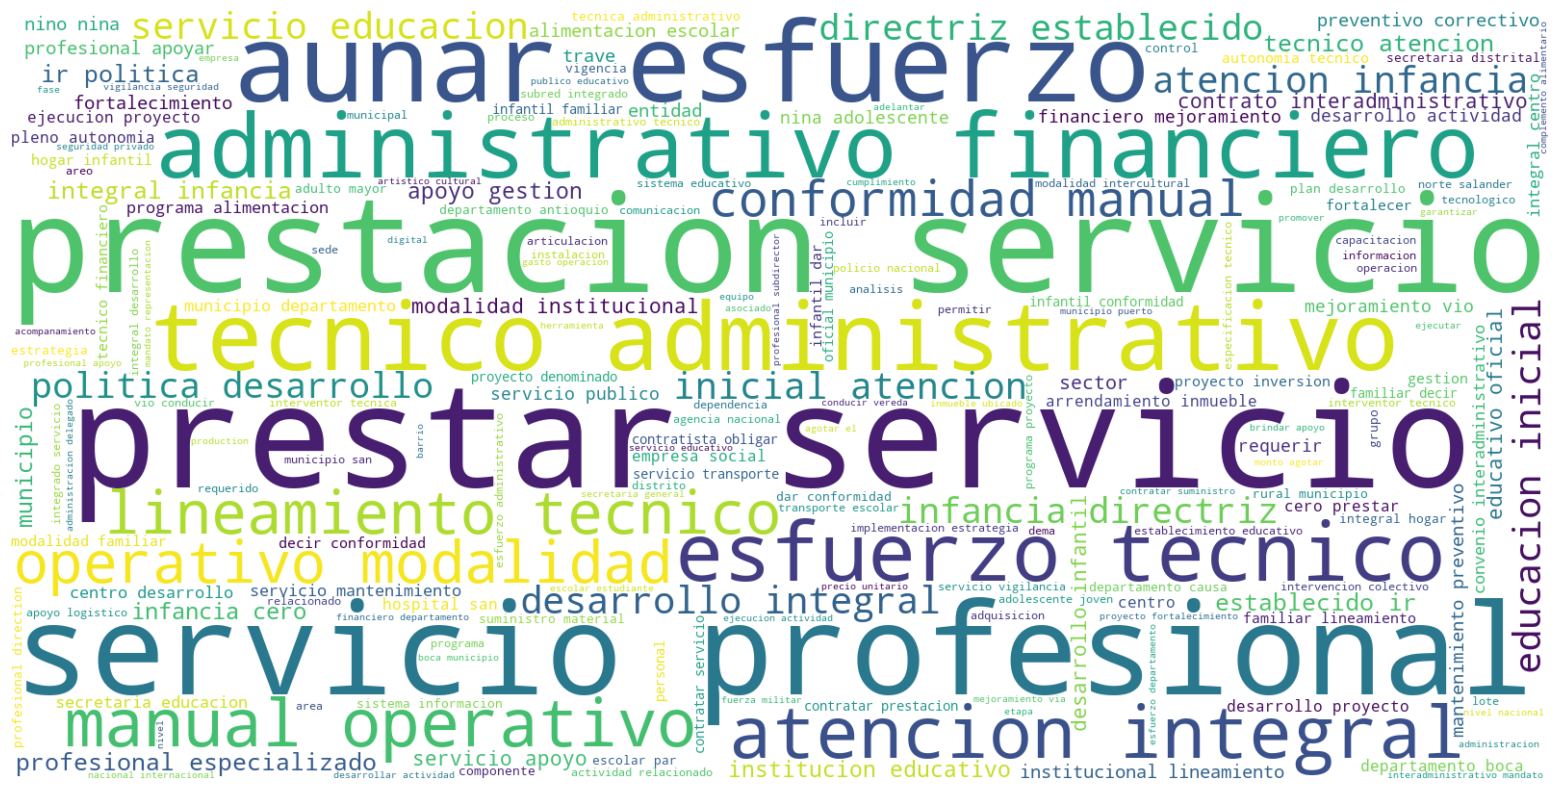

In [14]:
# Cargamos las librerías a utilizar
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Creamos el objeto WordCloud con el documento de lemas
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(" ".join(clean_list))


# Mostramos la nube de palabras usando Matplotlib
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off") # elimina los ejes y marcas para tener una visualización más limpia.
plt.show()

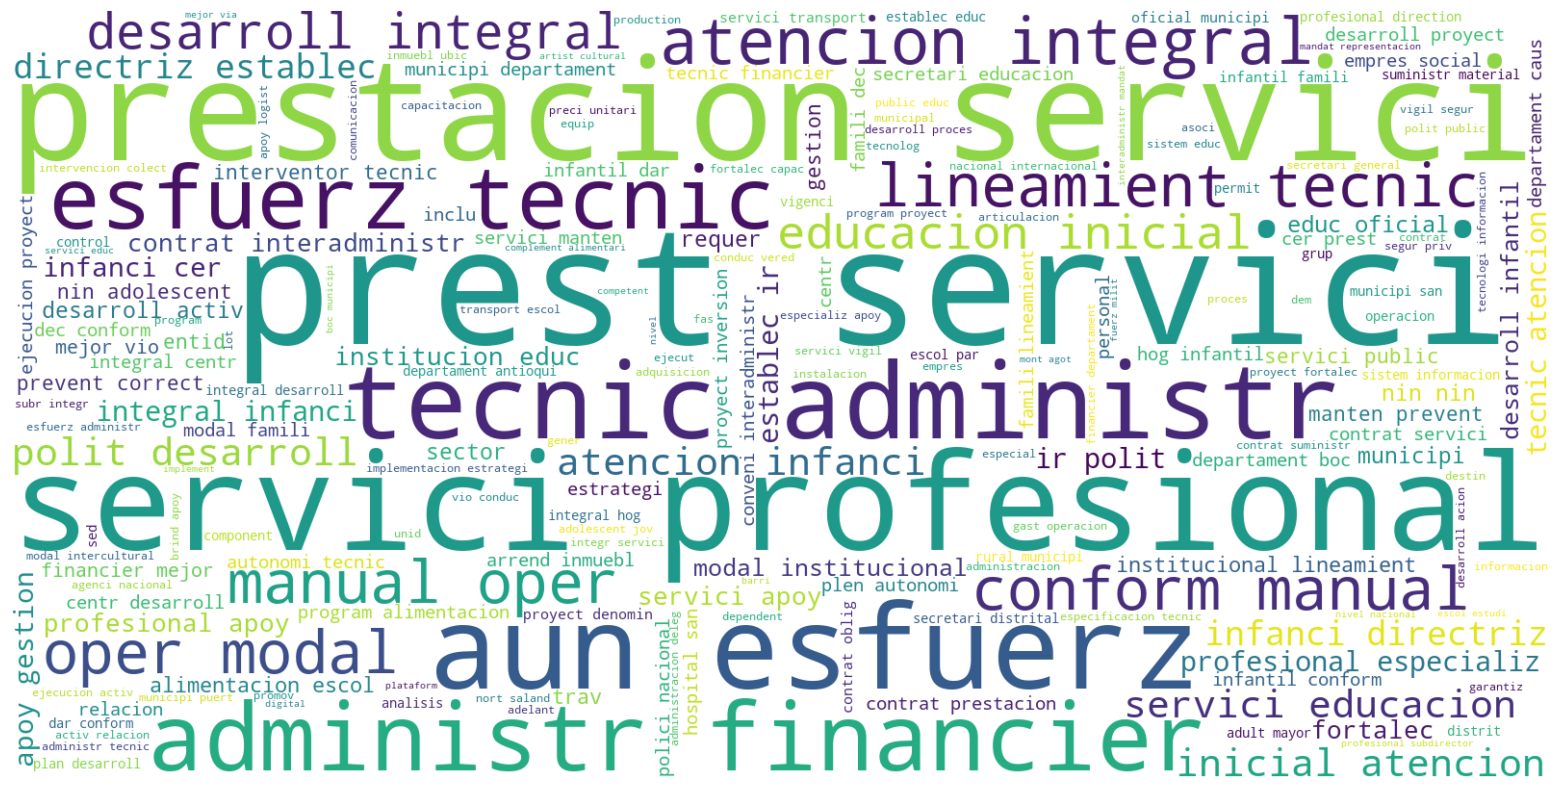

In [15]:
# Creamos el objeto WordCloud con el documento de lemas
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(" ".join(clean_stemming_list))


# Mostramos la nube de palabras usando Matplotlib
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off") # elimina los ejes y marcas para tener una visualización más limpia.
plt.show()

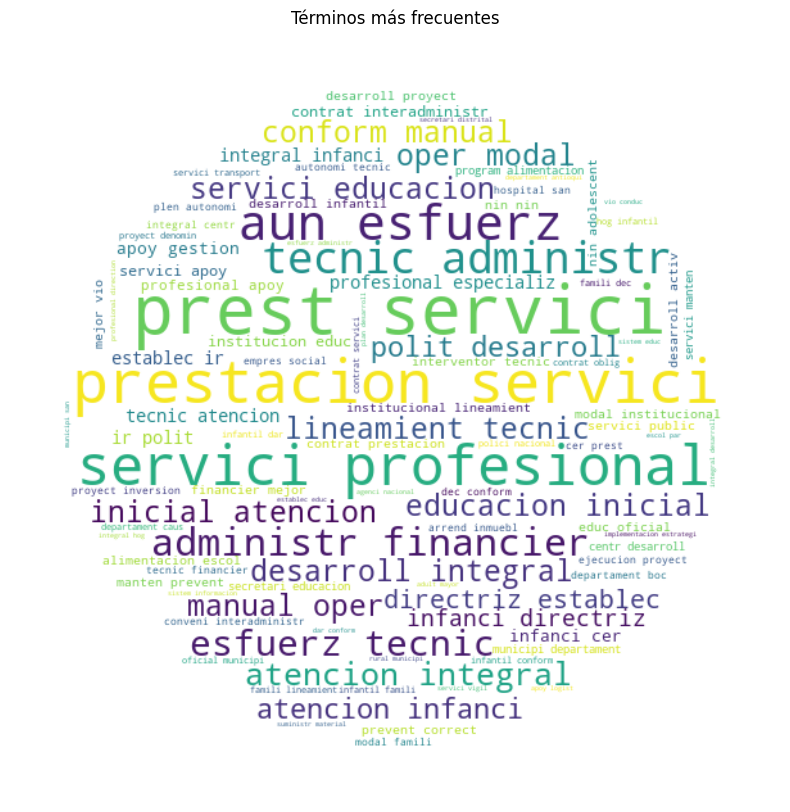

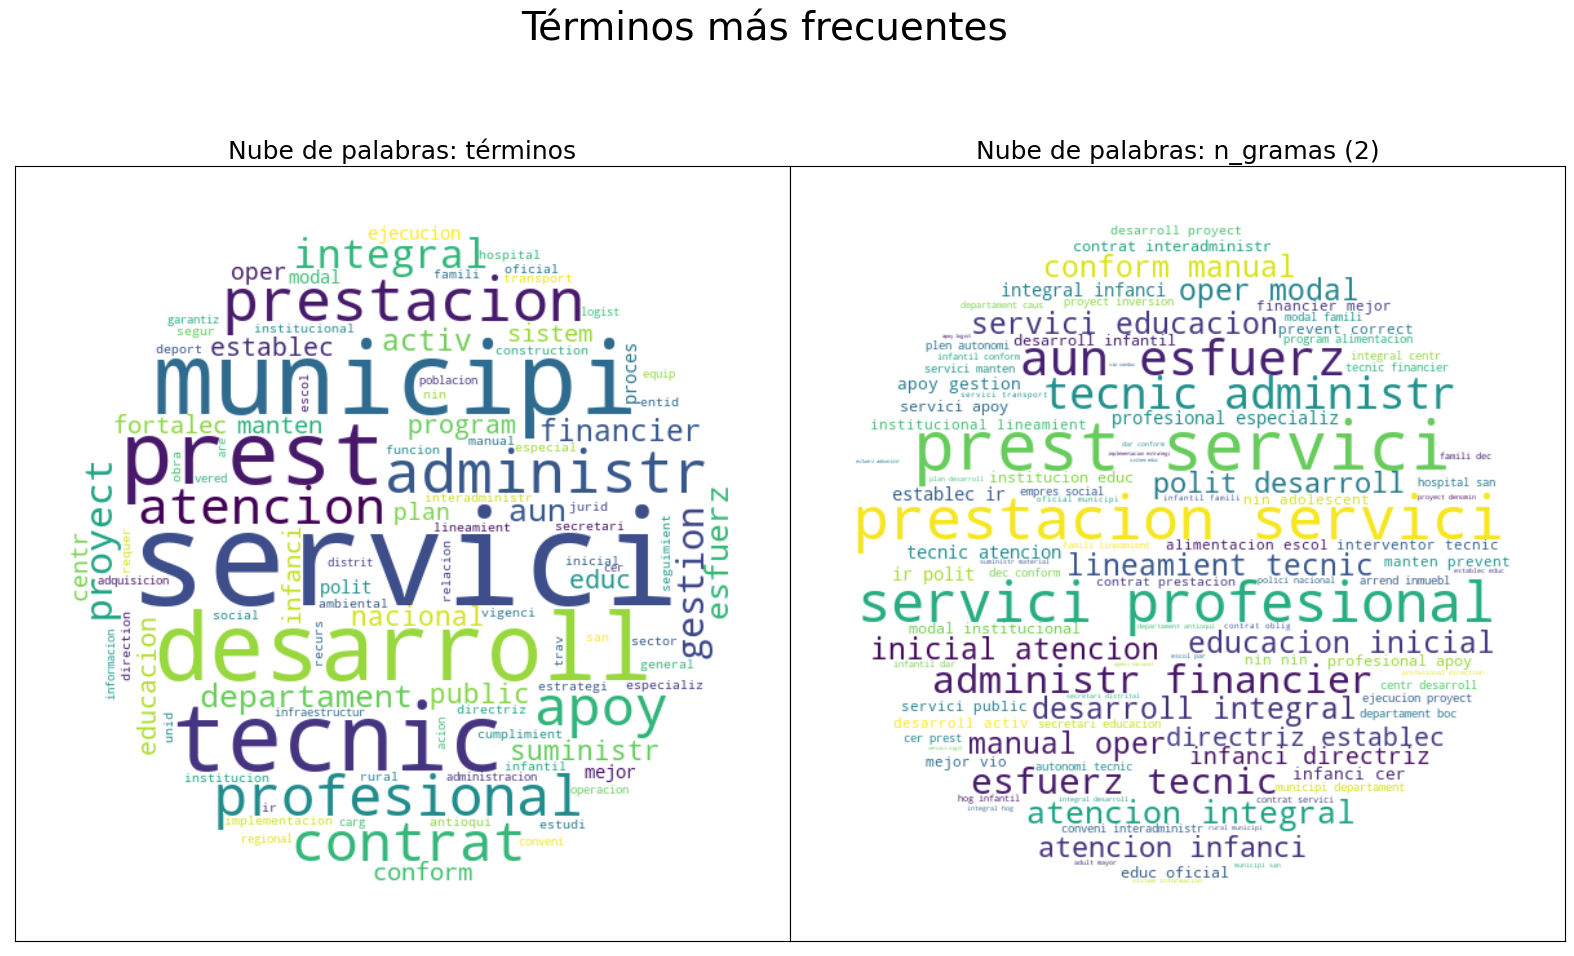

In [16]:
nube_palabras(" ".join(clean_stemming_list), n_grama=2,  hor=0.9, graficar=True) #ubicacion_archivo='salida/nube_bi.jpg',
par_nubes(" ".join(clean_stemming_list), n1=1, n2=2)#ubicacion_archivo='INPUTS/IMG/mapa_colombia.jpg'

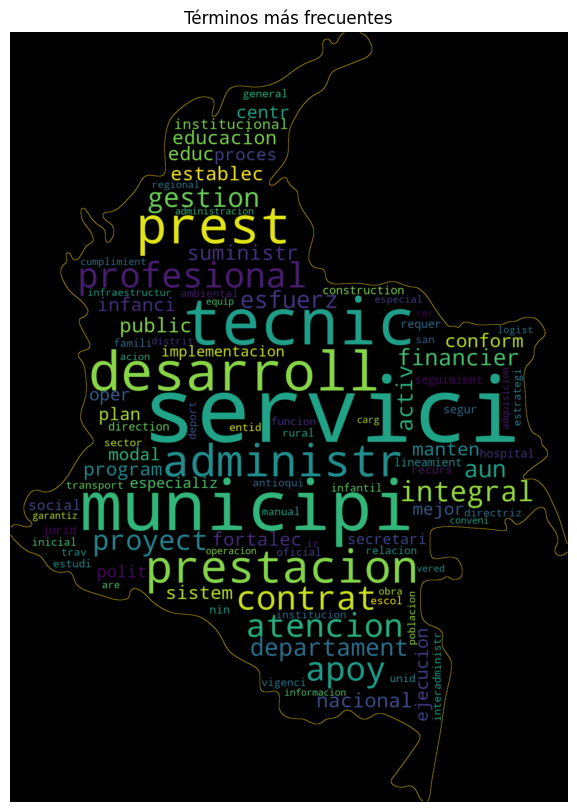

In [17]:
# Nube de palabras con forma personalizada
nube_palabras(" ".join(clean_stemming_list), n_grama=1, semilla=130, hor=0.9, color_contorno='gold',
              grosor_contorno=1, color_fondo='black', forma='../INPUTS/IMG/mapa_colombia.jpg')


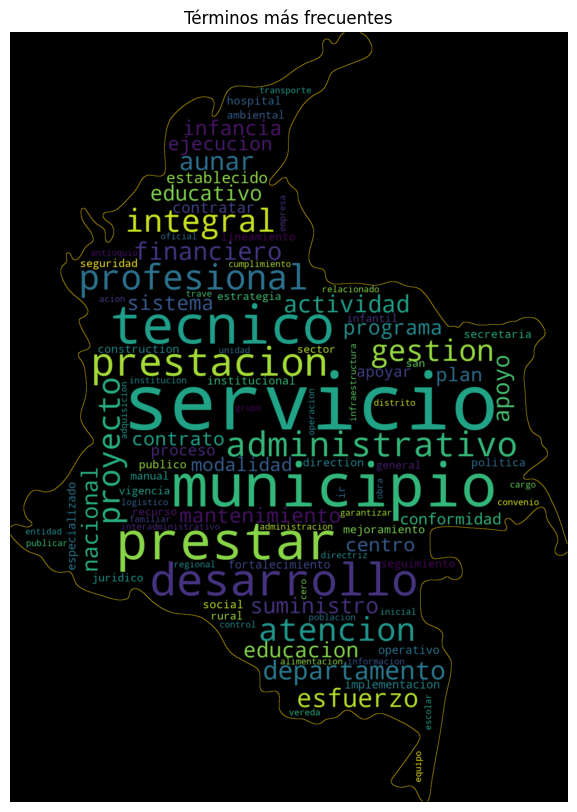

In [18]:
# Nube de palabras con forma personalizada
nube_palabras(" ".join(clean_list), n_grama=1, semilla=130, hor=0.9, color_contorno='gold',
              grosor_contorno=1, color_fondo='black', forma='../INPUTS/IMG/mapa_colombia.jpg')


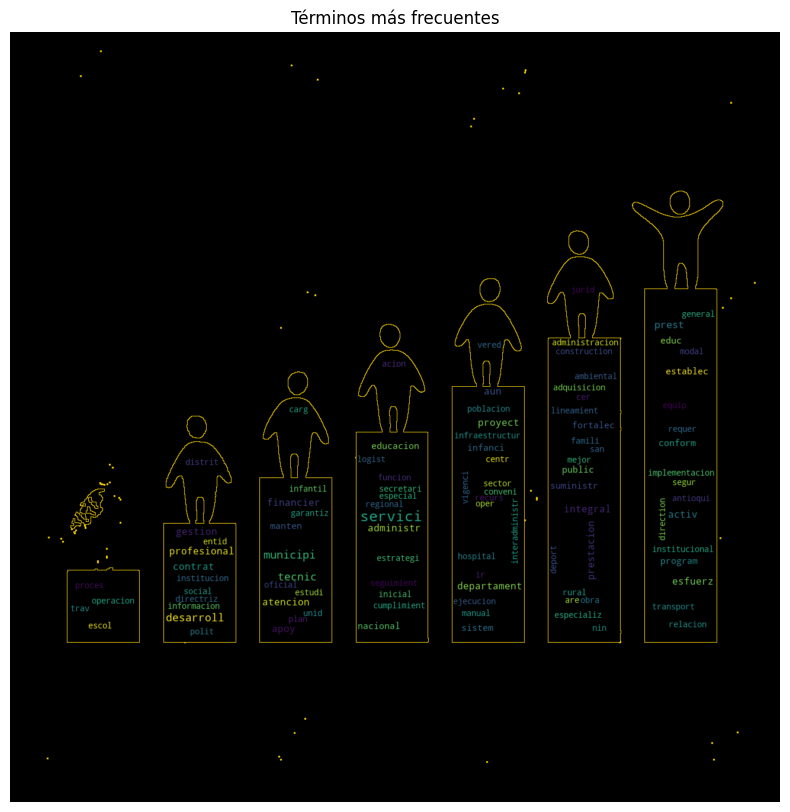

In [19]:
# Nube de palabras con forma personalizada
nube_palabras(" ".join(clean_stemming_list), n_grama=1, semilla=130, hor=0.9, color_contorno='gold',
              grosor_contorno=1, color_fondo='black', forma='../INPUTS/IMG/progreso.jpg')

In [8]:
# Exportar archivo de muestra: Se realiza preprocesamiento con el 35% del total de la data

#resultado_dask.to_parquet("../OUTPUT/muestra_al_35_sector.paquet.gzip")



# Cargar un archivo Parquet
df = pd.read_parquet("../OUTPUT/muestra_al_35_sector.paquet.gzip")

# Guardar el DataFrame en formato CSV
df.to_csv("../Data/muestra_al_35_sector.csv", index=False)